
# SIEM Alert Prioritization – Model Training

## Objective
Train and evaluate a machine learning model to prioritize SIEM alerts.
This notebook uses engineered features to classify alerts based on risk.

Model:
- Random Forest Classifier (SOC-friendly, explainable)

Outputs:
- Trained model
- Evaluation metrics


**Imports**

In [4]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


**Load engineered features**

In [19]:
import pandas as pd

alerts = pd.read_csv("siem_alerts.csv")
X = pd.read_csv("siem_features.csv")
df.head()

,failed_attempts,success_attempts,privilege_change,timestamp_2024-01-01 00:40:00,timestamp_2024-01-01 00:48:00,timestamp_2024-01-01 01:07:00,timestamp_2024-01-01 01:22:00,timestamp_2024-01-01 01:32:00,timestamp_2024-01-01 01:51:00,timestamp_2024-01-01 02:08:00,...,destination_host_SERVER-7,destination_host_SERVER-8,destination_host_SERVER-9,user_bob,user_john,user_root,login_time_night,host_criticality_high,host_criticality_low,host_criticality_medium
0,0,0,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,0,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False



## 1. Split Features and Target


In [22]:
y = alerts["label"]

print("X shape:", X.shape)
print("y shape:", y.shape)

assert len(X) == len(y)


X shape: (2000, 2242)
y shape: (2000,)



## 2. Train-Test Split


In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((1600, 2242), (400, 2242))


## 3. Train Random Forest Model


In [24]:

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.



## 4. Model Evaluation


In [25]:

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.945

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       180
           1       1.00      0.90      0.95       220

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.95       400



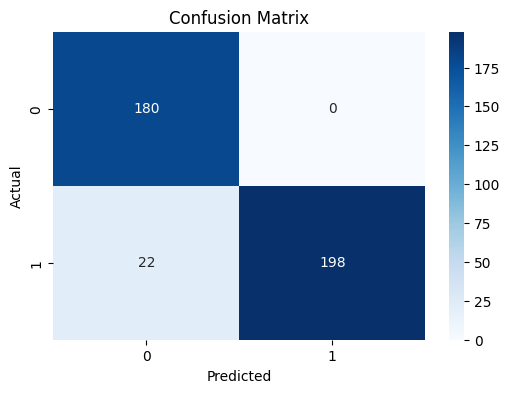

In [26]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 5. Feature Importance (SOC Insight)


In [27]:

importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15)


,0
alert_type_MALWARE_EXEC,0.147085
failed_attempts,0.101596
privilege_change,0.089772
alert_type_PRIV_ESC,0.078595
alert_type_PORT_SCAN,0.074076
alert_type_AUTH_SUCCESS,0.053674
success_attempts,0.042793
login_time_night,0.006121
user_bob,0.005627
host_criticality_medium,0.004875



## 6. Save Trained Model


In [28]:

import joblib

MODEL_PATH = "/content/siem_alert_priority_model.pkl"
joblib.dump(rf_model, MODEL_PATH)

print("Model saved to:", MODEL_PATH)


Model saved to: /content/siem_alert_priority_model.pkl



## Summary

- Trained Random Forest for SIEM alert prioritization
- Evaluated using precision, recall, and confusion matrix
- Extracted feature importance for SOC explainability
- Model saved for SHAP analysis and deployment

Next step: Model Explainability (SHAP)
